In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('p_data.csv').set_index('Unnamed: 0')

In [4]:
df.head()

,Дата публикации,Дата окончания приема заявок,Код региона,Регион,Способ проведения,ОКПД2,Реестровый номер аукциона,Размер обеспечения заявки,Валюта обеспечения заявки,Размер обеспечения контракта,...,Дата и время последнего изменения,Площадка проведения Название,Площадка проведения URL,Инн организатора,Кпп организатора,Валюта,Заказчик,offer id,group_id,available
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2023-04-04 18:04:29,2023-04-12 09:00:00,77,Москва,Электронный аукцион,NaN,0373200307323000083,17665.35,RUB,5.0,...,2023-04-04 18:08:10,Государственные закупки (44-ФЗ),https://gos.roseltorg.ru,7727656790,NaN,RUB,"<offer id=""32312256116_1"" group_id=""3231225611...",32312256116_1,32312256116,True
1,2023-04-04 18:00:18,2023-04-17 10:00:00,77,Москва,Запрос предложений,80.20.1,32312256116,0.00,RUB,0.0,...,2023-04-04 18:02:39,Коммерческие закупки и закупки по 223-ФЗ,https://com.roseltorg.ru,7719167509,771901001.0,RUB,"<offer id=""32312256130_1"" group_id=""3231225613...",32312256130_1,32312256130,True
2,2023-04-04 18:00:08,2023-04-21 08:00:00,77,Москва,Аукцион,27.33.13.130,32312256130,2473300.96,RUB,0.0,...,2023-04-04 18:02:34,Коммерческие закупки и закупки по 223-ФЗ,https://com.roseltorg.ru,7709919968,770901001.0,RUB,"<offer id=""32312256131_1"" group_id=""3231225613...",32312256131_1,32312256131,True
3,2023-04-04 17:59:10,2023-04-12 08:00:00,77,Москва,Аукцион МСП,17.29.11.110,32312256131,0.00,NaN,0.0,...,2023-04-04 18:02:33,Закупки среди субъектов МСП,https://msp.roseltorg.ru,7706032800,770601001.0,RUB,"<offer id=""SP9522233_1"" group_id=""SP9522233"" a...",SP9522233_1,SP9522233,True
4,2023-04-04 17:55:37,2023-04-05 17:55:37,77,Москва,Аукцион,25.73.30,9522233,0.00,NaN,0.0,...,2023-04-04 18:02:30,Портал Поставщиков,https://zakupki.mos.ru,7737124402,772401001.0,RUB,"<offer id=""SP9522233_2"" group_id=""SP9522233"" a...",SP9522233_2,SP9522233,True


# Посчитаем примерно ожидаемый Размер обеспечения заявки для конкретного региона

In [6]:
df_region_mean1['Размер обеспечения заявки'].apply(lambda v: int(v / 1000) * 1000)

Регион
Алтайский край             1000
Амурская область           6000
Архангельская область      5000
Астраханская область       7000
Байконур                   7000
                          ...  
Ханты-Мансийский АО      181000
Челябинская область      263000
Чукотский АО              16000
Ямало-Ненецкий АО         45000
Ярославская область       20000
Name: Размер обеспечения заявки, Length: 84, dtype: int64

# Посчитаем примерно ожидаемый Размер обеспечения контракта для конкретного региона

In [7]:
df_region_mean2 = df[['Размер обеспечения контракта', 'Регион']].groupby('Регион').agg('mean')

In [10]:
df_region_mean2['Размер обеспечения контракта'].apply(lambda v: int(v / 1000) * 1000)

Регион
Алтайский край              5000
Амурская область           29000
Архангельская область      11000
Астраханская область       20000
Байконур                    7000
                          ...   
Ханты-Мансийский АО       374000
Челябинская область       958000
Чукотский АО                   0
Ямало-Ненецкий АО        1026000
Ярославская область       143000
Name: Размер обеспечения контракта, Length: 84, dtype: int64

In [7]:
df_mini = df.sample(n=100)
df_mini_method_counts = df_mini[['Способ проведения', 'offer id']].groupby('Способ проведения').agg('count')


df_method_counts_cleared = df_mini_method_counts[df_mini_method_counts['offer id'] > np.mean(df_mini_method_counts['offer id']) / 2.]


df_method_counts_cleared = df_method_counts_cleared.sort_values('offer id', ascending=False)
df_method_counts_cleared.loc['Другое', 'offer id'] = sum(df_method_counts_cleared[df_method_counts_cleared['offer id'] < np.mean(df_method_counts_cleared['offer id']) / 2.]['offer id'])

# Пример функционала дашборда

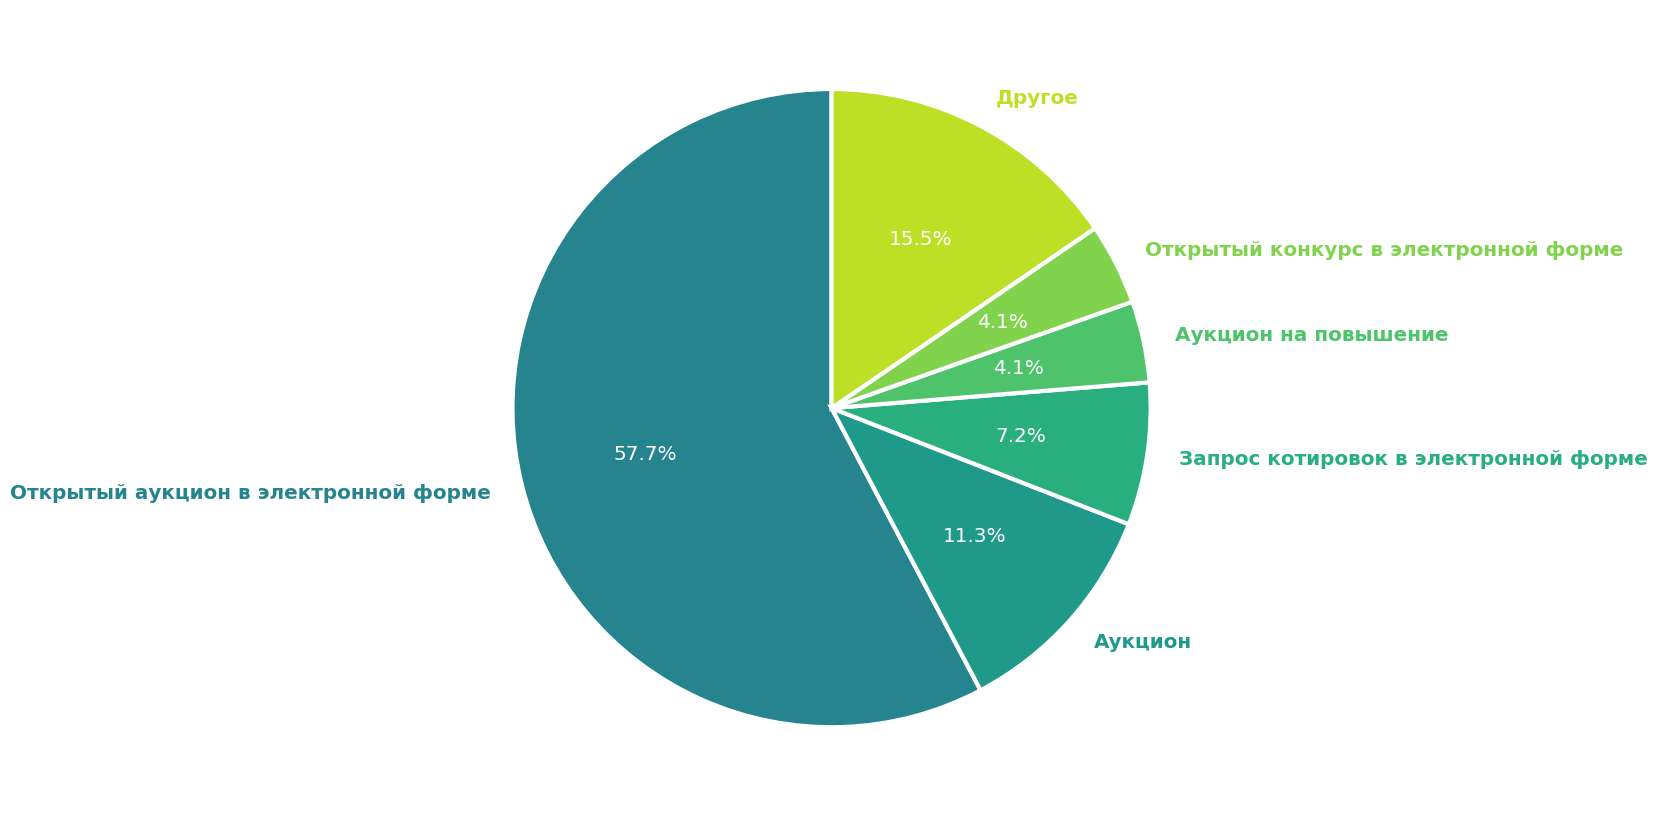

In [8]:
fig, ax = plt.subplots(figsize=(16,16))

# Get four different grey colors.
cmap = plt.get_cmap('viridis')
colors = list(cmap(np.linspace(0.45, 0.9, len(df_method_counts_cleared['offer id']))))


patches, texts, pcts = ax.pie(
    df_method_counts_cleared['offer id'], labels=df_method_counts_cleared.index, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors)

for i, patch in enumerate(patches):

    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.tight_layout()

In [9]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


In [10]:
df_mini_cleared  = df_mini[df_mini['Размер обеспечения заявки'] > 0.]

In [11]:
dist1 = df_mini_cleared['Размер обеспечения заявки']
dist_left = dist1[np.mean(dist1) > dist1]
dist_right = dist1[np.mean(dist1 ) < dist1]

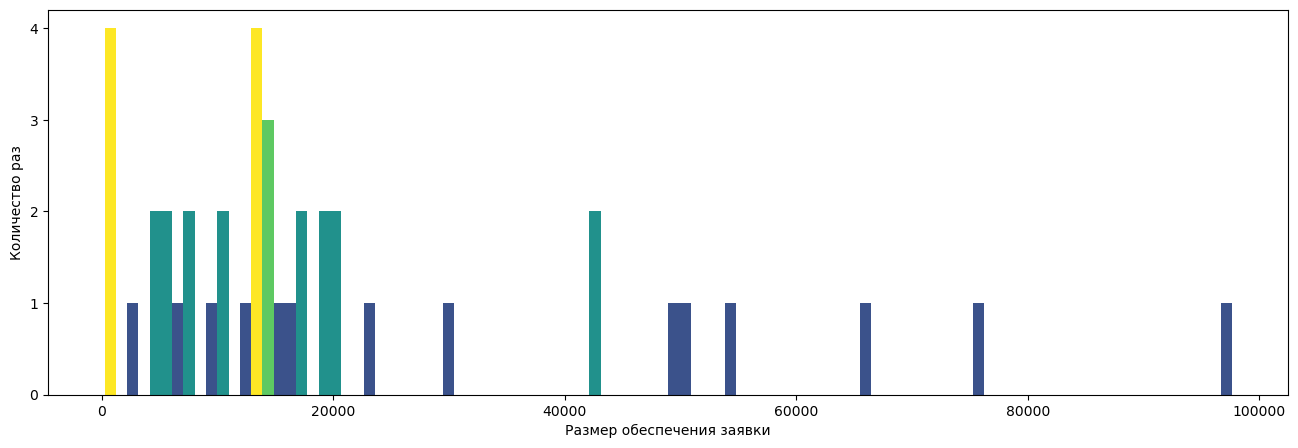

In [15]:
fig, axs = plt.subplots(figsize=(16,5))
n_bins = 100
N, bins, patches = axs.hist(dist_left, bins=n_bins)

fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs.set(xlabel ='Размер обеспечения заявки', ylabel ='Количество раз')

loc = plticker.MultipleLocator(base=1)
axs.yaxis.set_major_locator(loc)

plt.show()

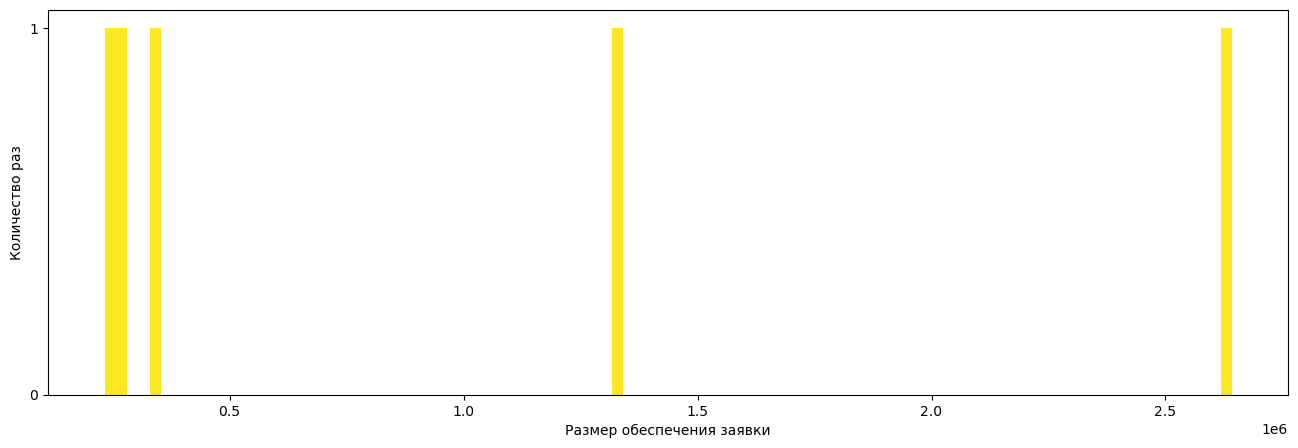

In [16]:
fig, axs = plt.subplots(figsize=(16,5))
n_bins = 100
N, bins, patches = axs.hist(dist_right, bins=n_bins)

fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs.set(xlabel ='Размер обеспечения заявки', ylabel ='Количество раз')

loc = plticker.MultipleLocator(base=1)
axs.yaxis.set_major_locator(loc)
plt.show()